## Hypothesis:
The age of citibike riders is normally distributed

## Null Hypothesis
The age of citibike riders is not normally distributed within a significance of 0.05.

In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import urllib2
import zipfile
import scipy.stats

%pylab inline

import json
import csv
import requests

Populating the interactive namespace from numpy and matplotlib


In [4]:
def getCitiBikeCSV(datestring):    
    download = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"
    if os.path.isfile(datestring + "-citibike-tripdata.zip"):
        print("zip file already exists")
    else:
        request = urllib2.urlopen (download)
        output = open(datestring + "-citibike-tripdata.zip", "w")
        output.write(request.read())
        output.close()
    if os.path.isfile(datestring + "-citibike-tripdata.csv"):
        print ("csv file already exists")
    else:
        os.system("unzip " + datestring + "-citibike-tripdata.zip")

In [5]:
#loop for multiple datestrings
datestrings = ['201606', '201607', '201608']
for datestring in datestrings:
    getCitiBikeCSV(datestring)

In [6]:
#loop for reading and combining csv files
for datestring in datestrings:
    df = pd.read_csv(datestring + "-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,8/1/2016 00:01:22,8/1/2016 00:06:11,302,Avenue D & E 3 St,40.720828,-73.977932,428,E 3 St & 1 Ave,40.724677,-73.987834,16920,Subscriber,1961.0,1
1,457,8/1/2016 00:01:43,8/1/2016 00:09:21,285,Broadway & E 14 St,40.734546,-73.990741,432,E 7 St & Avenue A,40.726218,-73.983799,20084,Subscriber,1989.0,2
2,278,8/1/2016 00:02:10,8/1/2016 00:06:49,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3096,Union Ave & N 12 St,40.719240,-73.952420,18380,Subscriber,1971.0,1
3,862,8/1/2016 00:02:13,8/1/2016 00:16:36,280,E 10 St & 5 Ave,40.733320,-73.995101,280,E 10 St & 5 Ave,40.733320,-73.995101,24101,Subscriber,1995.0,1
4,407,8/1/2016 00:02:21,8/1/2016 00:09:09,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,428,E 3 St & 1 Ave,40.724677,-73.987834,18949,Subscriber,1993.0,1


In [7]:
len(df)

1557663

In [8]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,288,8/1/2016 00:01:22,8/1/2016 00:06:11,302,Avenue D & E 3 St,40.720828,-73.977932,428,E 3 St & 1 Ave,40.724677,-73.987834,16920,Subscriber,1961.0,1,2016-08-01 00:01:22
1,457,8/1/2016 00:01:43,8/1/2016 00:09:21,285,Broadway & E 14 St,40.734546,-73.990741,432,E 7 St & Avenue A,40.726218,-73.983799,20084,Subscriber,1989.0,2,2016-08-01 00:01:43
2,278,8/1/2016 00:02:10,8/1/2016 00:06:49,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3096,Union Ave & N 12 St,40.719240,-73.952420,18380,Subscriber,1971.0,1,2016-08-01 00:02:10
3,862,8/1/2016 00:02:13,8/1/2016 00:16:36,280,E 10 St & 5 Ave,40.733320,-73.995101,280,E 10 St & 5 Ave,40.733320,-73.995101,24101,Subscriber,1995.0,1,2016-08-01 00:02:13
4,407,8/1/2016 00:02:21,8/1/2016 00:09:09,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,428,E 3 St & 1 Ave,40.724677,-73.987834,18949,Subscriber,1993.0,1,2016-08-01 00:02:21


In [9]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [10]:
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [11]:
df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'], axis = 1, inplace = True)
df.head()

,date,age
0,2016-08-01 00:01:22,55.0
1,2016-08-01 00:01:43,27.0
2,2016-08-01 00:02:10,45.0
3,2016-08-01 00:02:13,21.0
4,2016-08-01 00:02:21,23.0


In [12]:
# dropping NaN values
df['age'].dropna(inplace= True)
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age
count,1.331827e+06
mean,3.758412e+01
std,1.149224e+01
min,1.600000e+01
25%,NaN
50%,NaN
75%,NaN
max,1.310000e+02


In [13]:
df['age'].median()

35.0

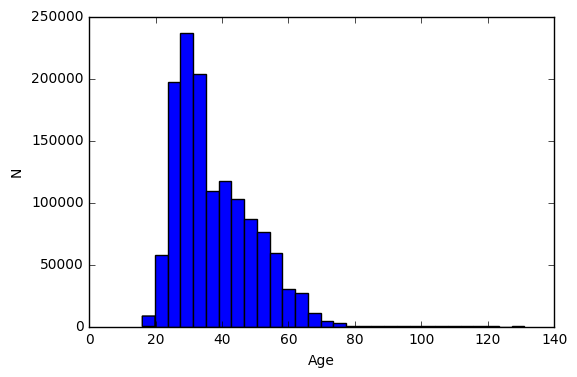

In [14]:
pl.hist(df['age'], bins = 30)
pl.ylabel('N')
pl.xlabel('Age')

In [15]:
np.random.seed(100000)

(array([  2.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   2.50000000e+01,
          4.30000000e+01,   6.00000000e+01,   1.27000000e+02,
          2.08000000e+02,   3.52000000e+02,   5.73000000e+02,
          7.52000000e+02,   1.13900000e+03,   1.55900000e+03,
          2.10600000e+03,   2.79600000e+03,   3.65500000e+03,
          4.32200000e+03,   5.12300000e+03,   5.89500000e+03,
          6.55500000e+03,   7.09600000e+03,   7.09900000e+03,
          7.06400000e+03,   7.08600000e+03,   6.65500000e+03,
          5.92100000e+03,   5.32900000e+03,   4.47900000e+03,
          3.58100000e+03,   2.93600000e+03,   2.18100000e+03,
          1.72600000e+03,   1.17000000e+03,   8.70000000e+02,
          5.73000000e+02,   3.53000000e+02,   2.23000000e+02,
          1.51000000e+02,   9.30000000e+01,   5.50000000e+01,
          2.20000000e+01,   1.40000000e+01,   5.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   2.00000000e+00,
        

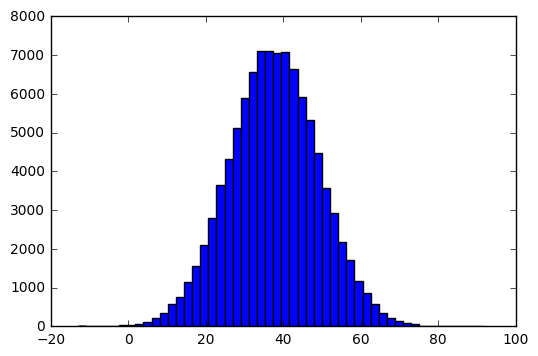

In [16]:
norm = {}
norm['age'] = np.random.normal(37.58412, 11.49224, 100000)
pl.hist(norm['age'], bins = 50)

In [17]:
scipy.stats.kstest(df['age'].values,'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.11791851372272799, pvalue=0.0)

### Since p-value < 0.05, we can reject the null hypothesis that the age of citibike riders is not normally distributed.

In [25]:
scipy.stats.kstest(df['age'].values,'logistic', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.19084127535538503, pvalue=0.0)

### Since p-value < 0.05, we can reject the null hypothesis that the age of citibike riders is not logistically distributed.

In [18]:
scipy.stats.anderson(df['age'].values, 'norm')

AndersonResult(statistic=25743.694271833403, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### The critical value corresponding to a significance of 5% is 0.787. Since 25743.7 > 0.787, we can reject the null hypothesis that the age of citibike riders is not normally distributed.

In [24]:
scipy.stats.anderson(df['age'].values, 'logistic')

AndersonResult(statistic=22512.234623335069, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### The critical value corresponding to a significance of 5% is 0.769. Since 22512.2 > 0.769, we can reject the null hypothesis that the age of citibike riders is not logistically distributed.